### Title: Making Prediction of Wine Quality

In [10]:
# Loading package
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(cowplot)

In [11]:
# Import dataset
url <- "https://raw.githubusercontent.com/SurajDatta/DSCI100_group_project/main/data/WineQT.csv"
wine_data <- read_csv(url)
colnames(wine_data) <- make.names(colnames(wine_data))

wine_data_clean <- wine_data %>%
     select(total.sulfur.dioxide, pH, alcohol, quality, residual.sugar, chlorides, density, citric.acid) %>%
     mutate(quality = as_factor(quality))
head(wine_data_clean)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



total.sulfur.dioxide,pH,alcohol,quality,residual.sugar,chlorides,density,citric.acid
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
67,3.20,9.8,5,2.6,0.098,0.9968,0.00
54,3.26,9.8,5,2.3,0.092,0.9970,0.04
60,3.16,9.8,6,1.9,0.075,0.9980,0.56
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
40,3.51,9.4,5,1.8,0.075,0.9978,0.00


|Variable             |Explanation                                                                       |
|---------------------|----------------------------------------------------------------------------------|
|total.sulfur.dioxide |The total amount of sulfur dioxide in wine.                                       |
|pH                   |Measure of how acidic/basic wine is.                                              | 
|alcohol              |The alchohol amount in wine.                                                      |
|quality              |The quality of wine.                                                              |
|residual.sugar       |The residual sugar in the wine after the sugar fermentation carried out by yeasts.|
|chlorides            |The chlorides amount in wine.                                                     |
|density              |The density of wine.                                                              |      
|citric.acid          |The amount of citric acid in wine.                                                |


Table 1: List of Potential Predicors.

This table lists the variables used to assess the quality of the wine as well as a discription for each. Each of these variables have some relationship with the qualit of wine and have potential to predict the bets wine on a given scale.

In [12]:
# data split
wine_split <- initial_split(wine_data_clean, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



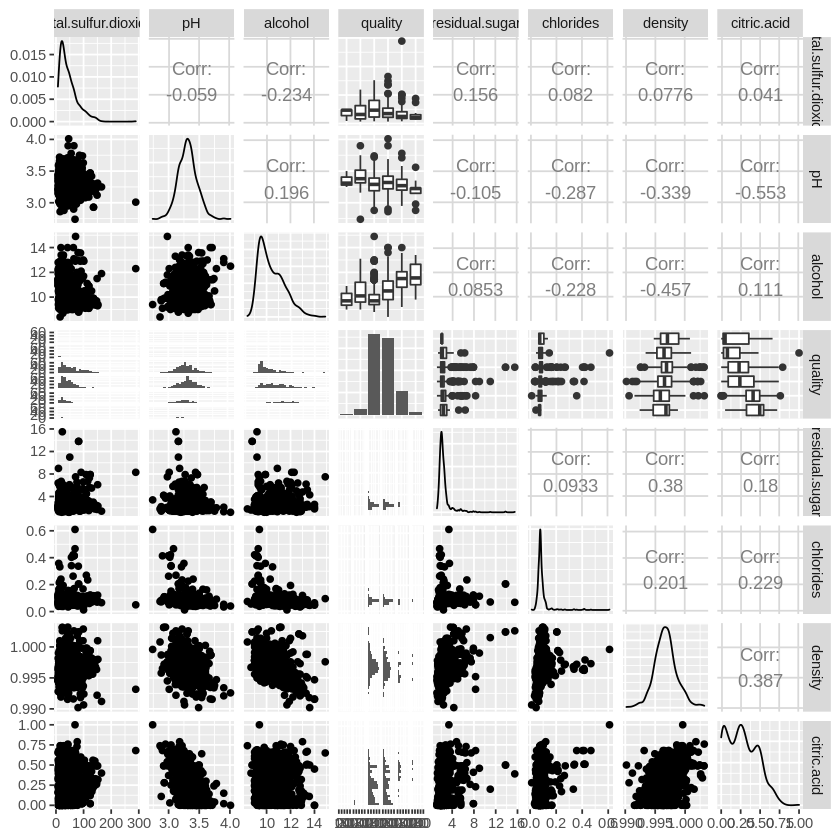

In [13]:
wine_ggpairs <- wine_train %>%
   ggpairs
wine_ggpairs

In [14]:
set.seed(1)

# Create list of all preditors
predictors <- c("total.sulfur.dioxide", "pH", "alcohol", "residual.sugar", 
                "chlorides", "density", "citric.acid")

# Set results dataframe containing rows of single preditors, the best k, and the accuracy.
results <- tibble()
results <- mutate(results, predictor = "", best_k = 0, accuracy = 0)

for (pred in predictors) {
    
    print(pred)
    
    # Select single predictor for the recipe 
    train_data <- wine_train %>%
       select(quality, all_of(pred))
    
    train_test <- wine_test %>%
       select(quality, all_of(pred))
    
    
    wine_recipe <- recipe(quality ~. , data = wine_train) %>%
      step_scale(all_predictors()) %>%
      step_center(all_predictors())

    knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

     wine_vfold <- vfold_cv(wine_train, v = 5, strata = quality)

    gridvals = tibble(neighbors = seq(1, 100))
    
     knn_results <- workflow() %>%
       add_recipe(wine_recipe) %>%
       add_model(knn_tune) %>%
       tune_grid(resamples = wine_vfold, grid = gridvals) %>%
       collect_metrics()


      accuracy <- knn_results %>% 
         filter(.metric == "accuracy") %>%
         arrange(desc(mean)) %>%
         slice(1) %>%
         pull(mean)
      accuracy

      best_k <- knn_results %>% 
         filter(.metric == "accuracy") %>%
         arrange(desc(mean)) %>%
         slice(1) %>%
         pull(neighbors)
      best_k
    
      results <- results %>%
         add_row(predictor = pred, best_k = best_k, accuracy = accuracy)
}

[1] "total.sulfur.dioxide"


! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold2: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...



[1] "pH"


! Fold2: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...



[1] "alcohol"


! Fold1: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...



[1] "residual.sugar"


! Fold2: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...



[1] "chlorides"


! Fold2: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...



[1] "density"


! Fold2: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...



[1] "citric.acid"


! Fold3: internal: No observations were detected in `truth` for level(s): '3', '8...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...



In [18]:
results %>% arrange(desc(accuracy))

predictor,best_k,accuracy
<chr>,<dbl>,<dbl>
citric.acid,53,0.5863612
chlorides,36,0.5805155
alcohol,71,0.5804137
residual.sugar,55,0.5802736
total.sulfur.dioxide,11,0.5792965
density,51,0.5745772
pH,44,0.5722997


### Result